<a href="https://colab.research.google.com/github/munazanjum/GA4-python-using-bigquery/blob/main/BigQuery_bquxjob_75126471_18ae4c4e29d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'lustrous-acumen-399315' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=lustrous-acumen-399315:US:bquxjob_75126471_18ae4c4e29d)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_75126471_18ae4c4e29d') # Job ID inserted based on the query results selected to explore
print(job.query)

# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [4]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_75126471_18ae4c4e29d') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,event_date,transaction_id,purchased_product_skus,item_categories
0,20210101,6542146188,"9199220,9199220","Apparel,Apparel"
1,20210101,463396072,"9184829,9196902,9199084,9195939,9196380,919593...","Writing Instruments,Stationery,,Office,Office,..."
2,20210101,3447887131,9195792,Apparel
3,20210101,4145966325,9199204,Shop by Brand
4,20210101,8695549122,"9195792,9196636,9195237","Apparel,Apparel,Apparel"
5,20210101,6737995895,"9196976,9196729,9198447,9188315,9195927,9195846","Campus Collection,New,Small Goods,Accessories,..."
6,20210101,9938479241,"9196735,9195949","Apparel,Apparel"
7,20210101,3822890750,"9195959,9195830,9188228","Bags,Lifestyle,Google"
8,20210101,5860078581,"9196623,9196691,9196711,9195549,9197718","Apparel,Apparel,Apparel,Uncategorized Items,Bags"
9,20210101,3854722217,9195295,Accessories


In [15]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data (replace with your own data)
data = pd.DataFrame({
    'transaction_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                       11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'purchased_product_skus': [
        '9199220,9199220',
        '9184829,9196902,9199084,9195939,9196380,9195937,9196381,9185002,9197329',
        '9195792',
        '9199204',
        '9195792,9196636,9195237',
        '9196976,9196729,9198447,9188315,9195927,9195846',
        '9196735,9195949',
        '9195959,9195830,9188228',
        '9196623,9196691,9196711,9195549,9197718',
        '9195295',
        '9199127,9180865,9194259,9184829,9196784,9188201,9195359,9195846,9196869,9196785,9200362,9188200,9188315,9195292',
        '9195846,9185002,9195845',
        '9197366,9196859,9188200,9197368,9195292,9188201,9196894',
        '9195130',
        '9184829,9200364,9184831,9200320,9200322,9196866,9200321,9184830,9180865,9180819',
        '9195249,9195130,9196782,9196862,9194990,9200362,9195966',
        '9196705,9199131,9188310,9184749',
        '9180825',
        '9196749,9195882,9194990',
        '9195968,9195967,9195966'
    ],
    'item_categories': [
        'Apparel,Apparel',
        'Writing Instruments,Stationery,,Office,Office,Office,Office,Office,Writing Instruments',
        'Apparel',
        'Shop by Brand',
        'Apparel,Apparel,Apparel',
        'Campus Collection,New,Small Goods,Accessories,Accessories,Clearance',
        'Apparel,Apparel',
        'Bags,Lifestyle,Google',
        'Apparel,Apparel,Apparel,Uncategorized Items,Bags',
        'Accessories',
        'Shop by Brand,Office,Accessories,Writing Instruments,Small Goods,Office,Accessories,Clearance,New,,Shop by Brand,Office,Accessories,Drinkware',
        'Clearance,Office,Stationery',
        'Campus Collection,New,Office,Campus Collection,Drinkware,Office,Accessories',
        'Apparel',
        'Writing Instruments,Shop by Brand,Writing Instruments,Apparel,Apparel,New,Apparel,Writing Instruments,Office,Google',
        'Apparel,Apparel,New,New,Apparel,Shop by Brand,Accessories',
        'New,Shop by Brand,Accessories,Accessories',
        'Uncategorized Items',
        'Apparel,Apparel,Apparel',
        'Accessories,Accessories,Accessories'
    ]
})

# Split the 'purchased_product_skus' and 'item_categories' into lists
data['purchased_product_skus'] = data['purchased_product_skus'].str.split(',')
data['item_categories'] = data['item_categories'].str.split(',')

# Perform one-hot encoding
te = TransactionEncoder()
one_hot_encoded = te.fit(data['item_categories']).transform(data['item_categories'])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=te.columns_)

# Concatenate the one-hot encoded columns with the original DataFrame
data_encoded = pd.concat([data[['transaction_id']], one_hot_encoded_df], axis=1)

# Find frequent itemsets
frequent_itemsets = apriori(data_encoded.drop('transaction_id', axis=1), min_support=0.1, use_colnames=True)

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Display frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Display association rules
print("\nAssociation Rules:")
print(association_rules_df)

# Interpretation of the results
print("\nInterpretation of the Results:")
for index, row in association_rules_df.iterrows():
    antecedent = set(row['antecedents'])
    consequent = set(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']

    print(f"Rule {index + 1}:")
    print(f"Antecedent: {antecedent}")
    print(f"Consequent: {consequent}")
    print(f"Support: {support:.2f}")
    print(f"Confidence: {confidence:.2f}")
    print(f"Lift: {lift:.2f}")
    print("-" * 30)


Frequent Itemsets:
    support                                           itemsets
0      0.10                                                 ()
1      0.35                                      (Accessories)
2      0.45                                          (Apparel)
3      0.10                                             (Bags)
4      0.10                                (Campus Collection)
5      0.15                                        (Clearance)
6      0.10                                        (Drinkware)
7      0.10                                           (Google)
8      0.30                                              (New)
9      0.25                                           (Office)
10     0.25                                    (Shop by Brand)
11     0.10                                      (Small Goods)
12     0.10                                       (Stationery)
13     0.10                              (Uncategorized Items)
14     0.15                         

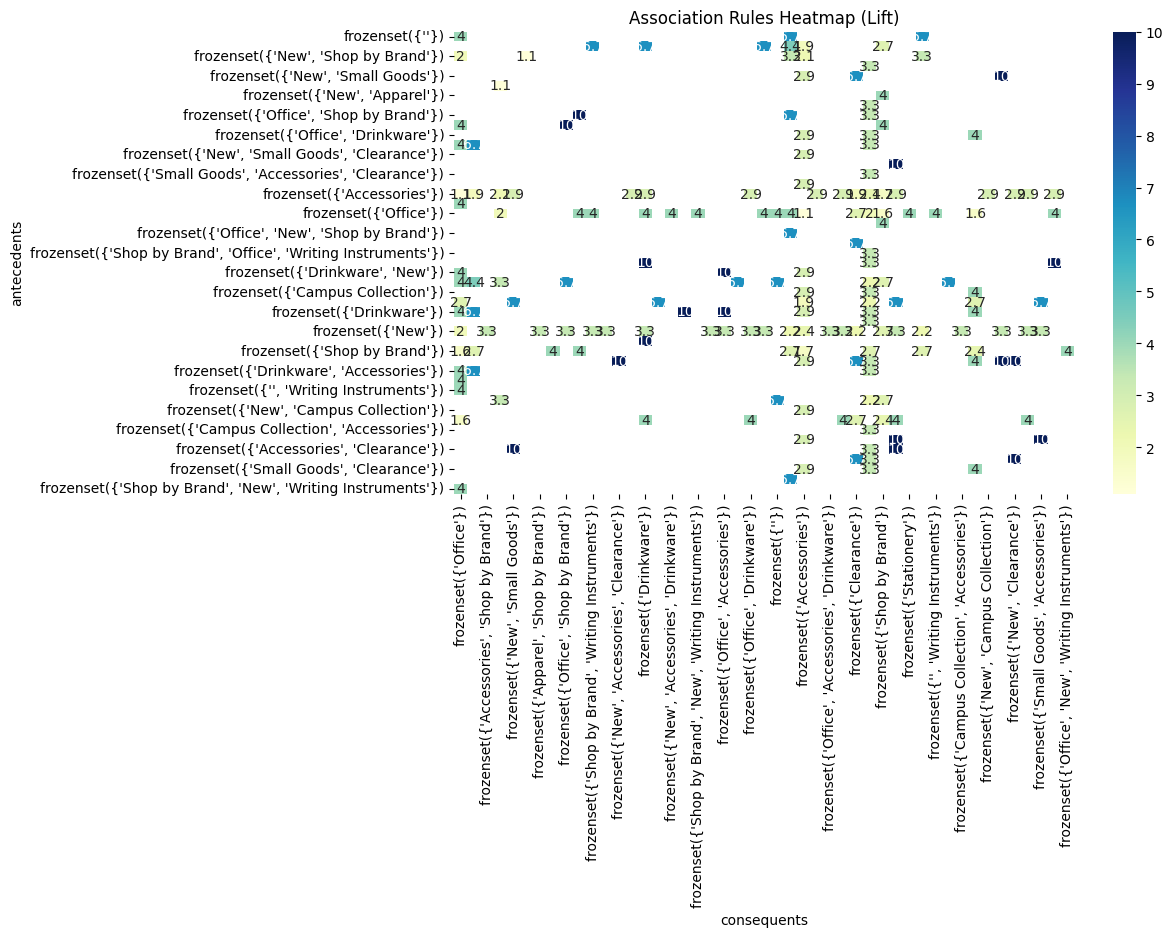

In [17]:
plt.figure(figsize=(10, 6))
pivot_table = association_rules_df.pivot(index='antecedents', columns='consequents', values='lift')
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)
plt.title("Association Rules Heatmap (Lift)")
plt.show()


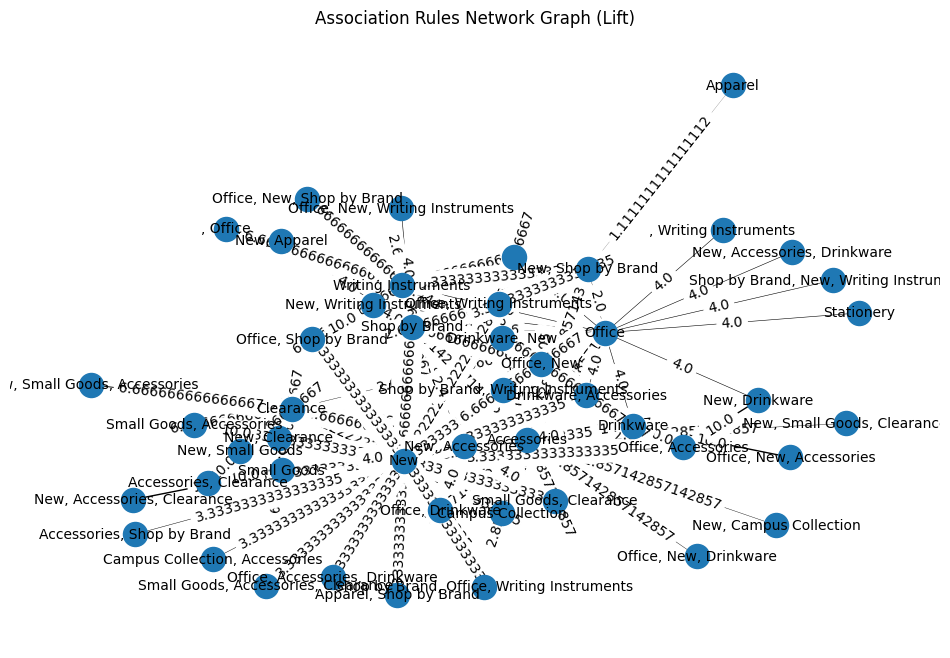

In [18]:
import networkx as nx

G = nx.Graph()
for _, row in association_rules_df.iterrows():
    G.add_edge(", ".join(row['antecedents']), ", ".join(row['consequents']), weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_nodes(G, pos, node_size=300)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=[d['weight'] * 0.1 for (u, v, d) in G.edges(data=True)])
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')
plt.title("Association Rules Network Graph (Lift)")
plt.axis('off')
plt.show()


Key Takeaways

"Apparel, Apparel" is the most common itemset with a support of 10%. This suggests that customers frequently buy multiple pieces of apparel together.
Several itemsets have support values above 10%, indicating popular combinations of products.

The "Accessories, Accessories, Accessories" itemset has a relatively high support of 15%, indicating that customers often purchase multiple accessories together.

Customers frequently purchase multiple items from the same category, such as "Apparel, Apparel," indicating a preference for matching clothing items.